In [1]:
# Integration of ht and pdx datasets.
# https://satijalab.org/seurat/articles/integration_introduction.html#performing-integration-on-datasets-normalized-with-sctransform-1

# Run integrate_seurat_objects.Rscript on the cluster. IntegrateData runs out of memory locally.

In [2]:
library(dplyr)
library(ggplot2)
library(EnsDb.Hsapiens.v86)
library(Seurat)
library(Signac)
library(repr)
#sessionInfo()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading req

In [3]:
seuratobj <- readRDS("rcmb56_integrated_seuratobj.rds")
seuratobj

An object of class Seurat 
258089 features across 12382 samples within 4 assays 
Active assay: integrated (3000 features, 3000 variable features)
 3 other assays present: RNA, ATAC, SCT
 2 dimensional reductions calculated: pca, umap

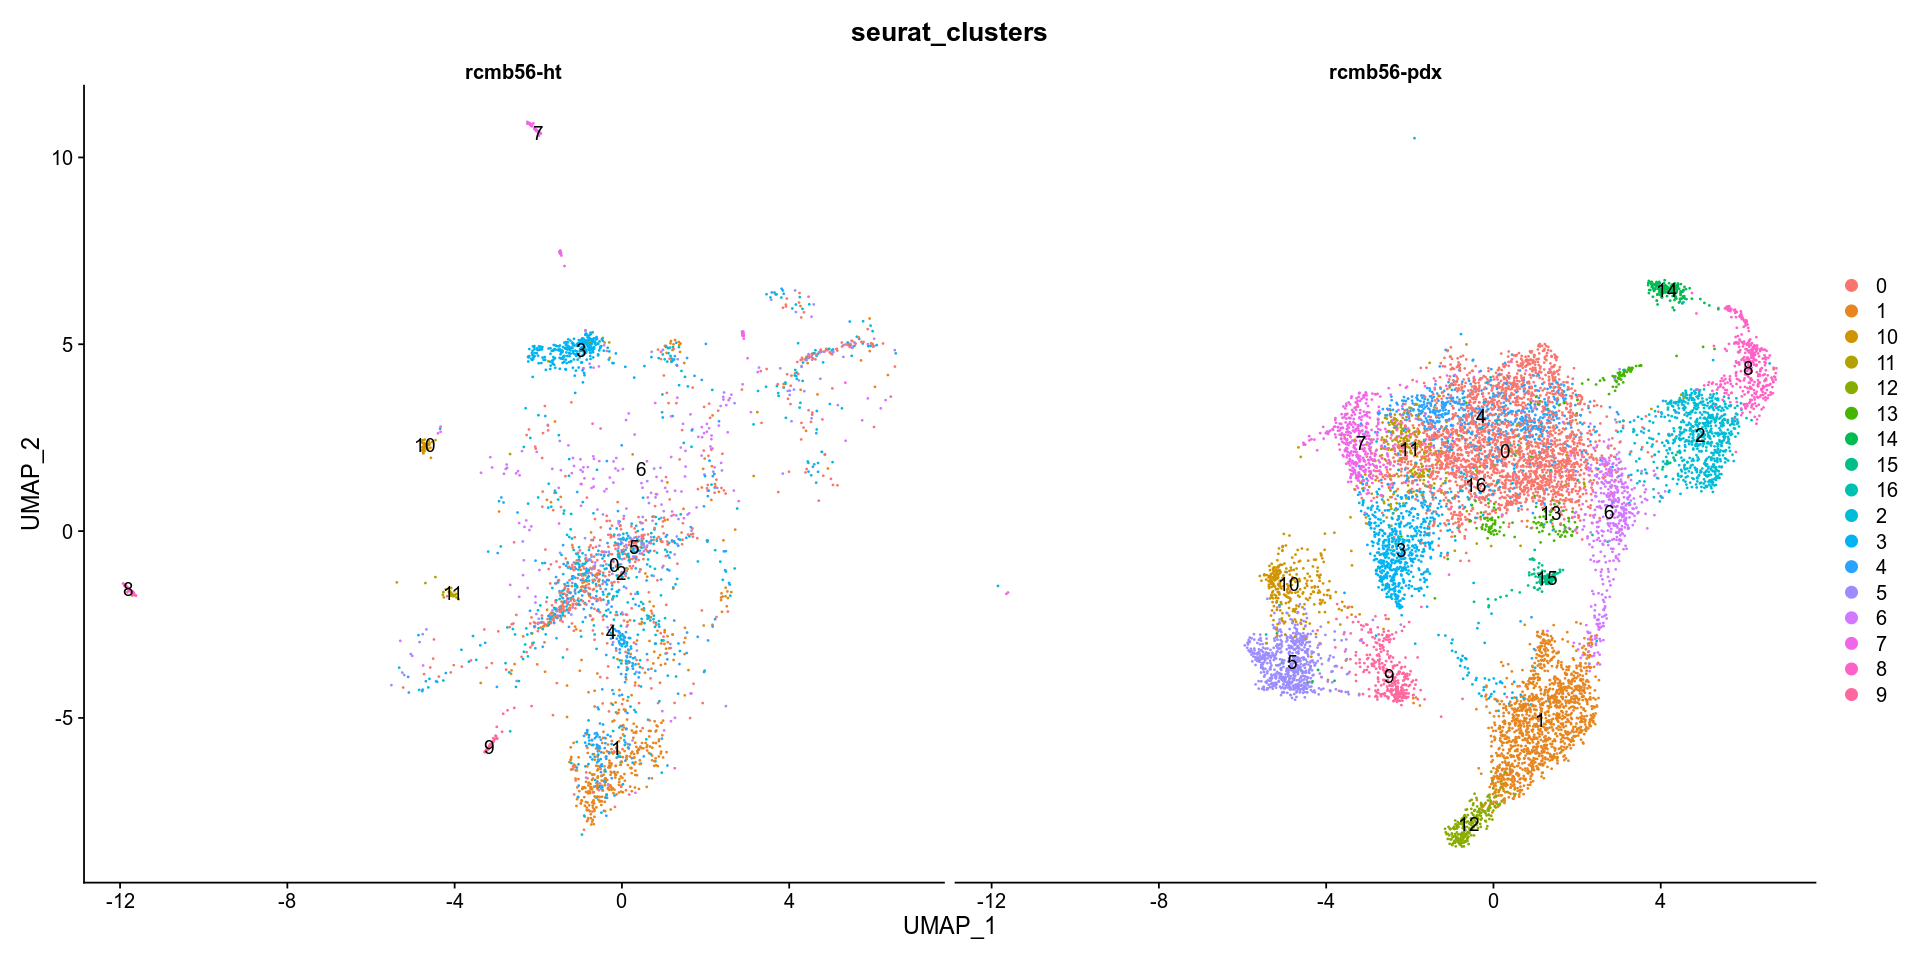

In [4]:
options(repr.plot.width=16, repr.plot.height=8)
#p1 <- DimPlot(seuratobj, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(seuratobj, reduction = "umap", group.by = "seurat_clusters",split.by="orig.ident",label=TRUE)
p2

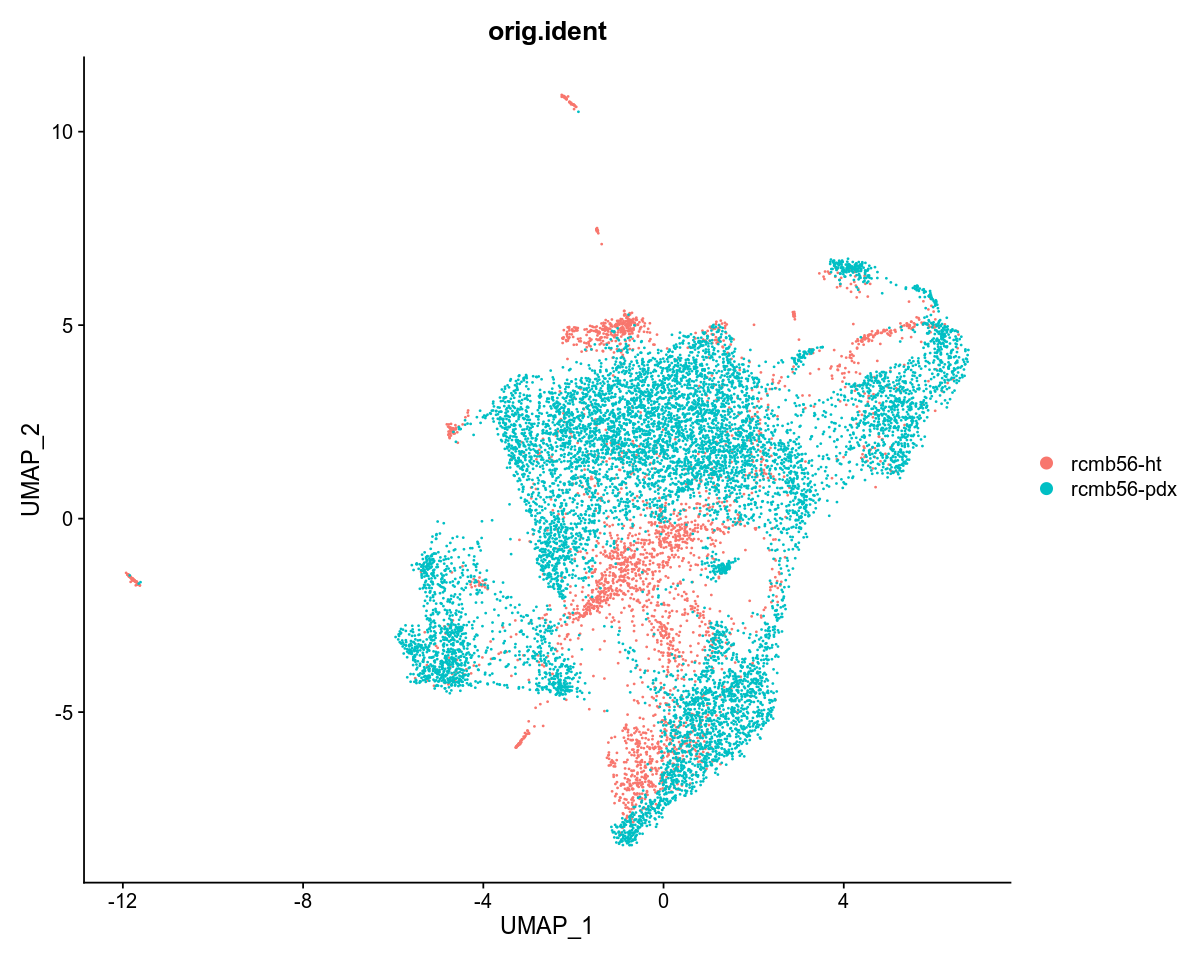

In [5]:
options(repr.plot.width=10, repr.plot.height=8)
p1 <- DimPlot(seuratobj, dims = c(1,2), reduction = "umap", group.by = "orig.ident")
p1

In [ ]:
# Re-cluster
seuratobj <- FindNeighbors(seuratobj, reduction = "pca", dims = 1:50)
seuratobj$sample_clusters <- seuratobj$seurat_clusters
seuratobj <- FindClusters(seuratobj, reduction.name = "integrated.umap", reduction.key = "integratedUMAP_")

In [50]:
saveRDS(seuratobj,"integrated_seuratobj.rds")

Computing nearest neighbor graph

Computing SNN

Warning message:
"The following arguments are not used: reduction.name, reduction.key"
Warning message:
"The following arguments are not used: reduction.name, reduction.key"


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12382
Number of edges: 499050

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8350
Number of communities: 21
Elapsed time: 1 seconds


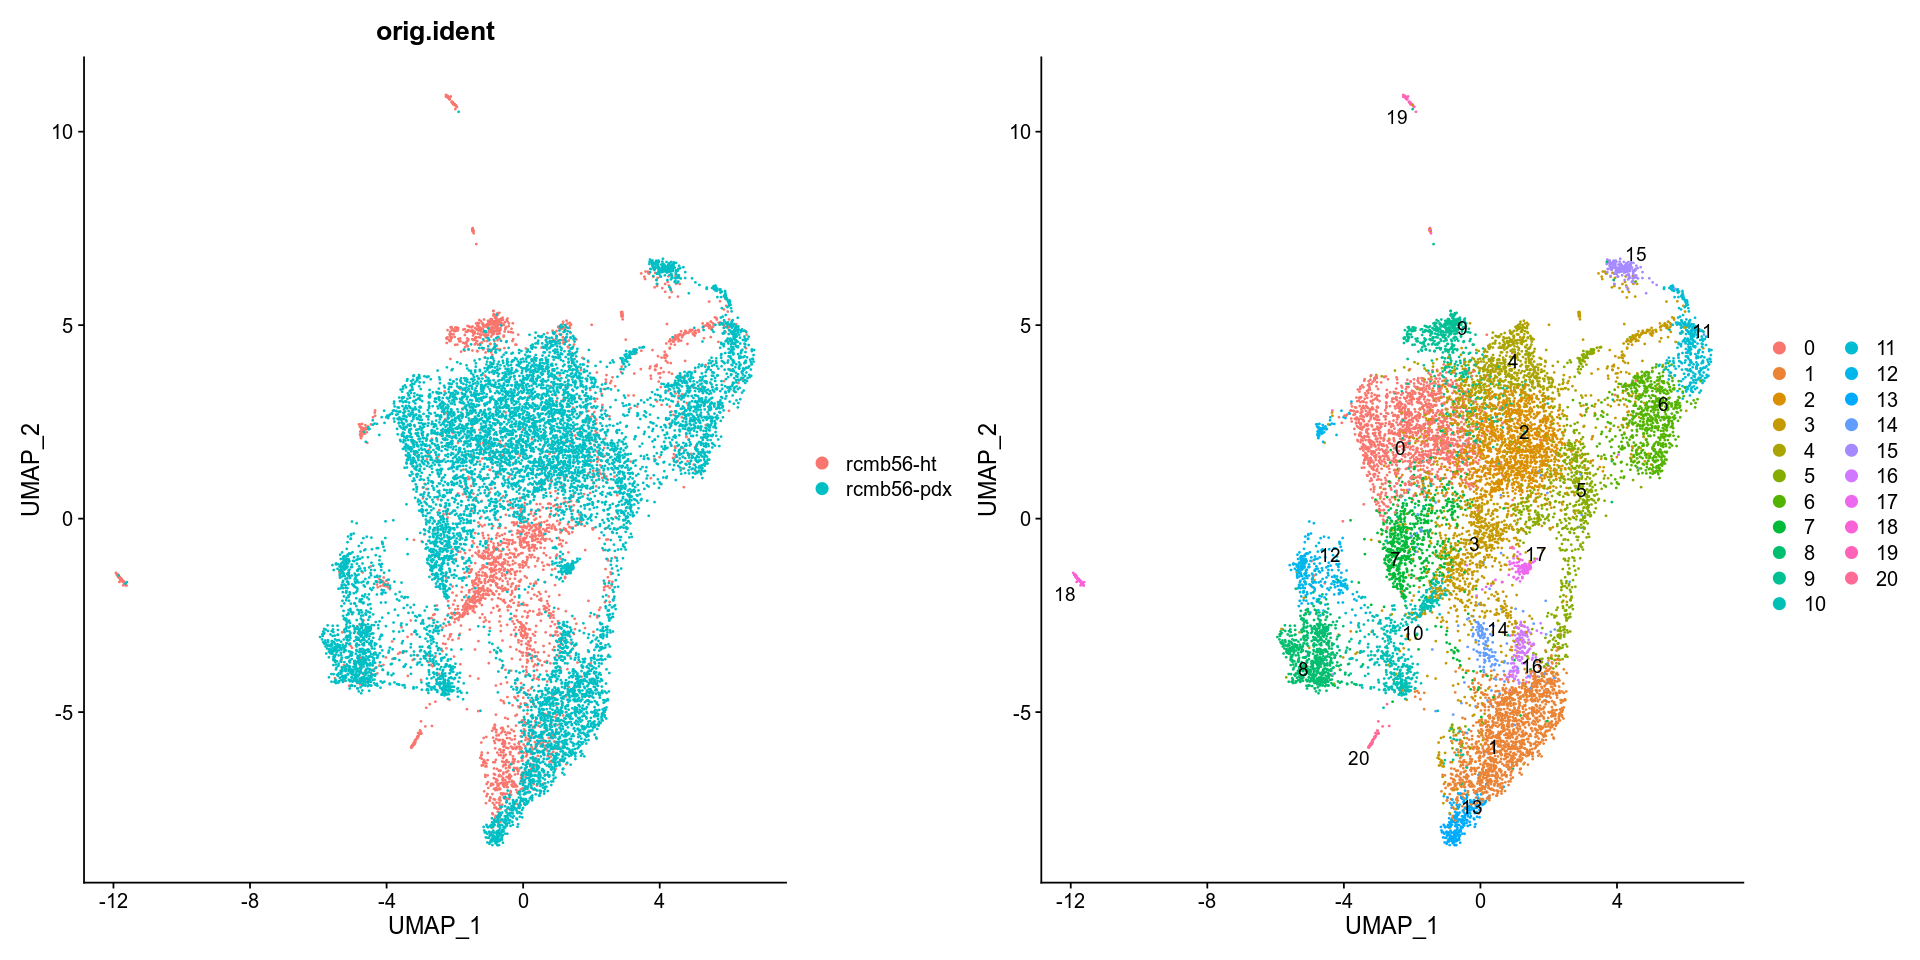

In [15]:
options(repr.plot.width=16, repr.plot.height=8)
p1 <- DimPlot(seuratobj, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(seuratobj, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

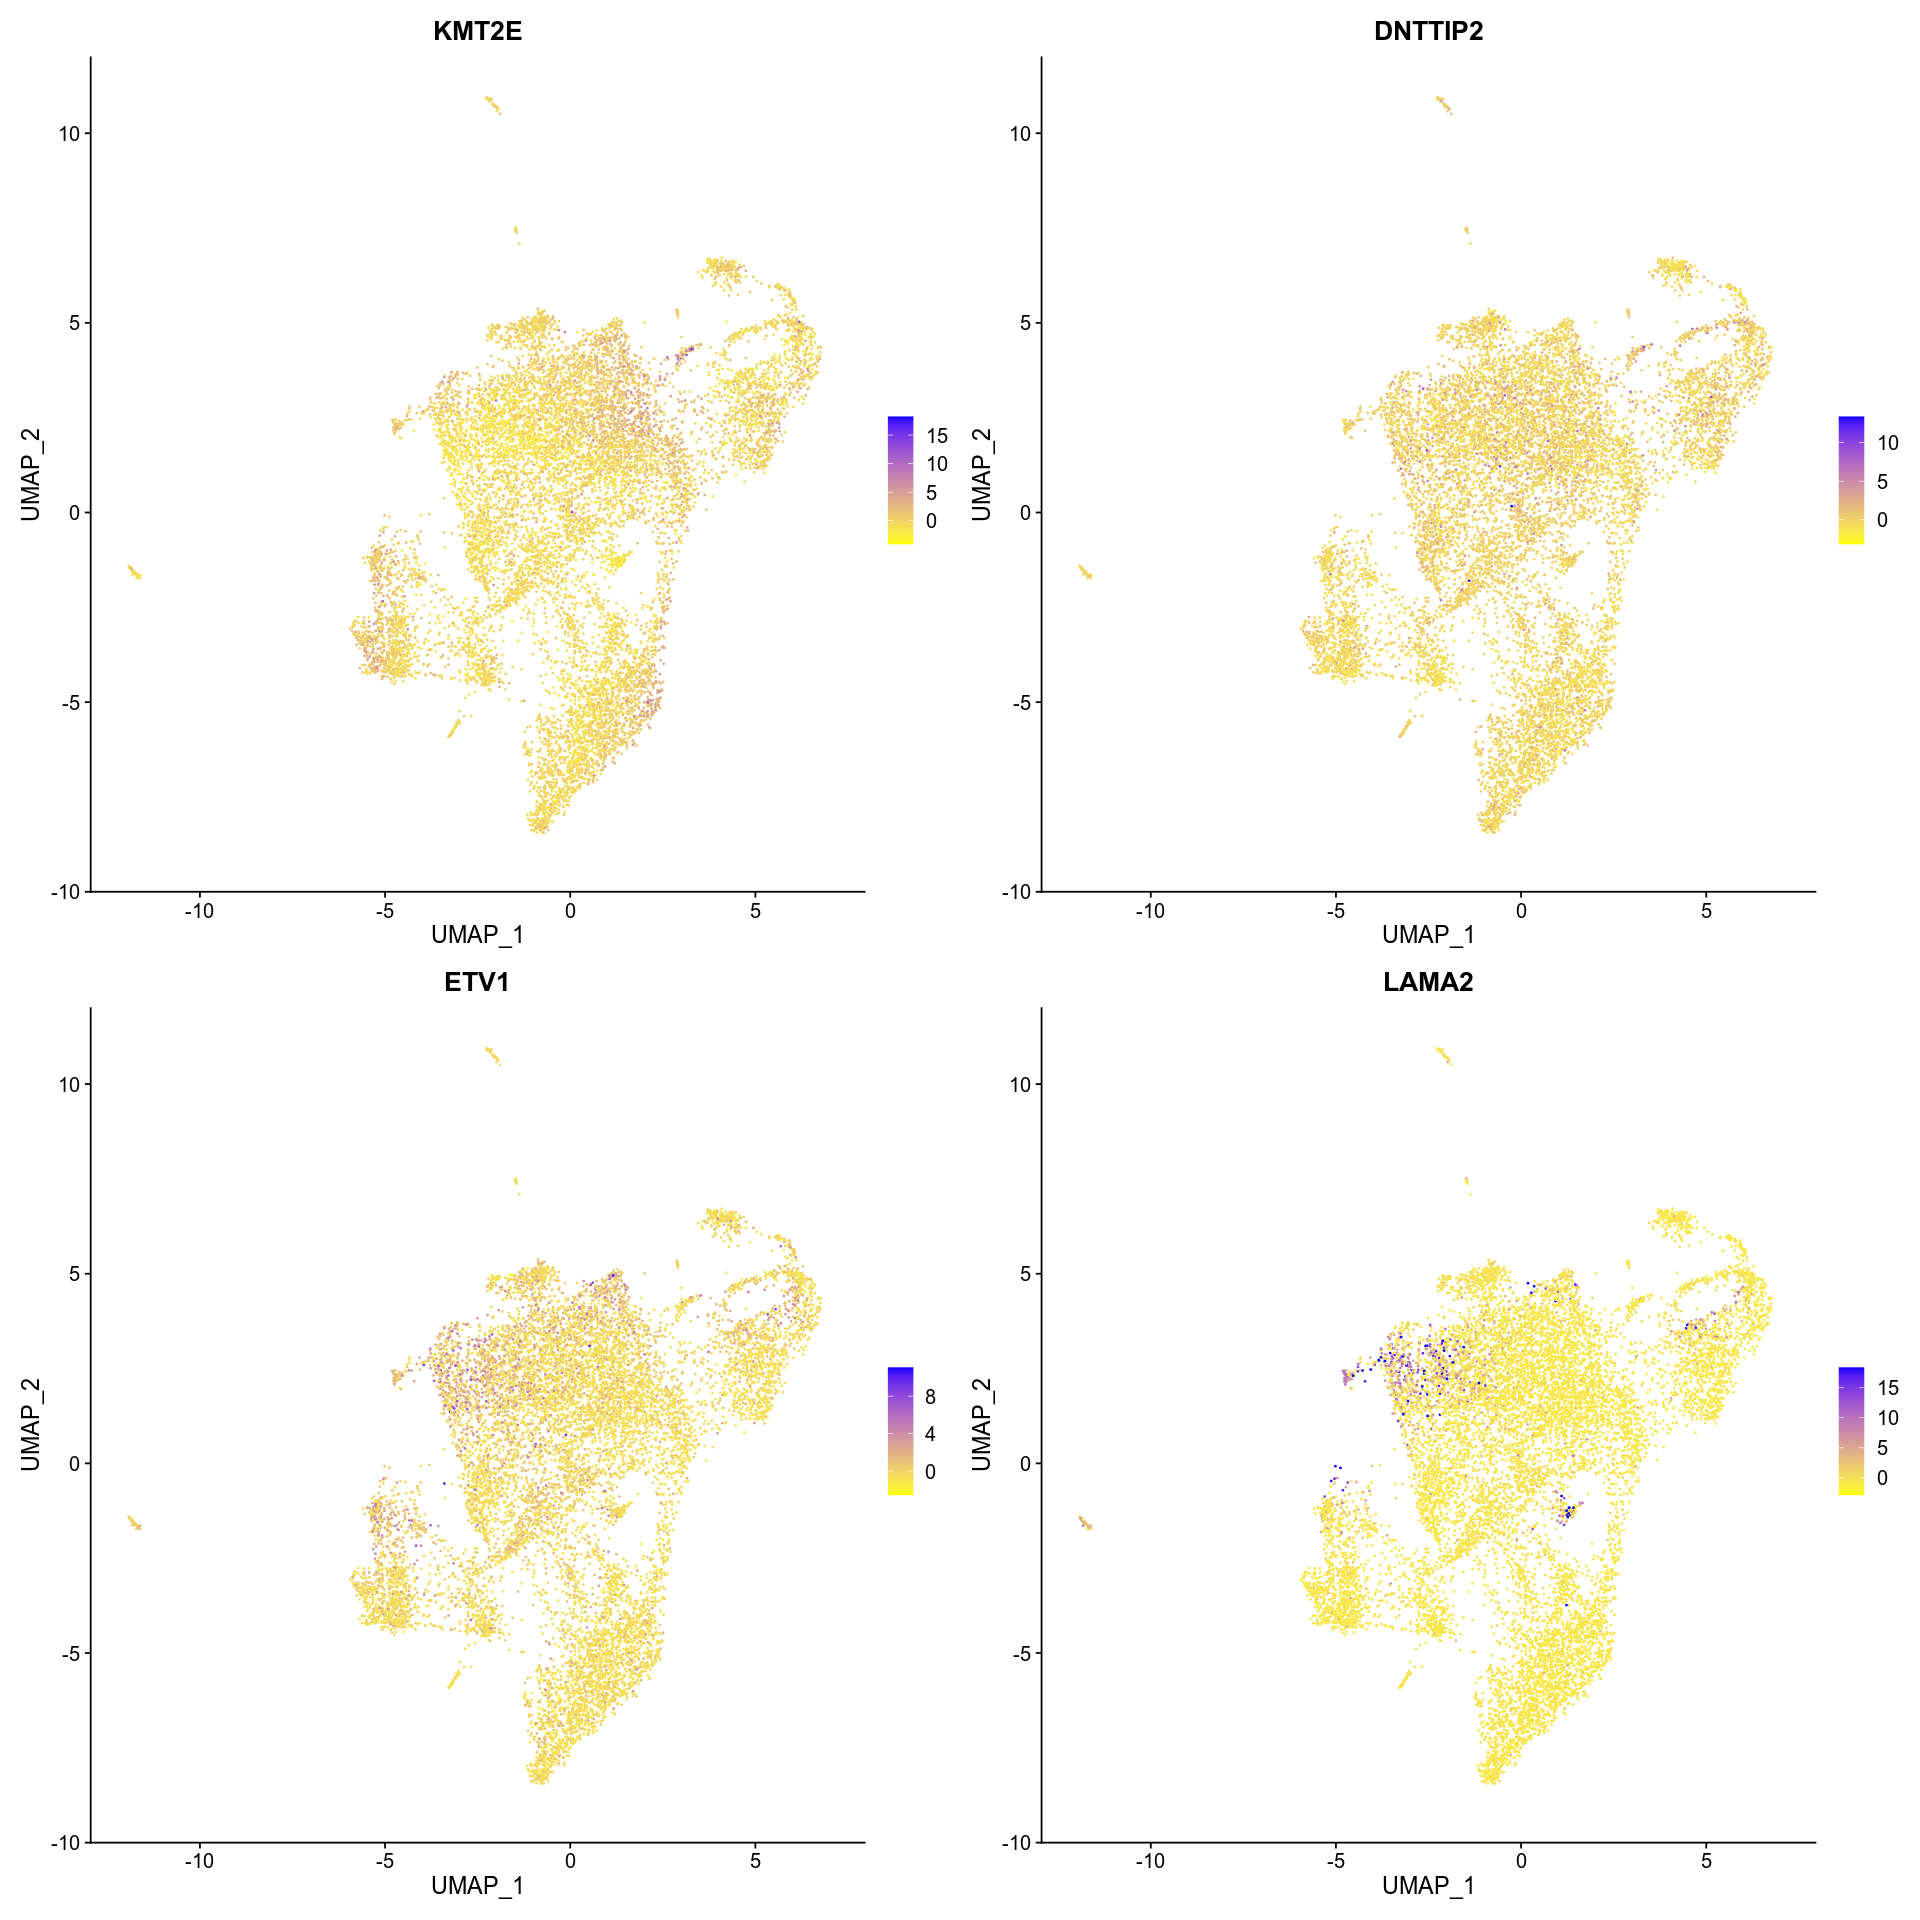

In [34]:
DefaultAssay(seuratobj) <- "integrated"
features = c('KMT2E','DNTTIP2','ETV1','GLI2','PTPRC','MOG','PDGFRA')
options(repr.plot.width=16, repr.plot.height=32)
FeaturePlot(seuratobj,features=features,cols=c('yellow','blue'))

In [49]:
DefaultAssay(seuratobj) <- "RNA"
filter_markers <- function(markers){
    markers["rcmb56-ht_delta"] <- abs(markers["rcmb56-ht_pct.1"] - markers["rcmb56-ht_pct.2"])
    markers["rcmb56-pdx_delta"] <- abs(markers["rcmb56-pdx_pct.1"] - markers["rcmb56-pdx_pct.2"])
    markers <- markers[ which( "rcmb56-pdx_delta" > .4 & "rcmb56-ht_delta" > .4),]
    return(markers)
}
for (i in seq(20,20)){
    markers <- FindConservedMarkers(seuratobj, ident.1 = i, grouping.var = "orig.ident", verbose = TRUE)
    #markers <- filter_markers(markers)
    print(head(markers))
    write.table(markers,paste0("FindConservedMarkers/",i,".tsv"),quote=FALSE,sep='\t')
}


Testing group rcmb56-ht: (20) vs (3, 7, 10, 1, 2, 14, 18, 11, 9, 13, 5, 8, 4, 17, 19, 12, 0, 6, 16)

Warning message:
"Identity: 20 not present in group rcmb56-pdx. Skipping rcmb56-pdx"
Warning message:
"Only a single group was tested"


       rcmb56-ht_p_val rcmb56-ht_avg_log2FC rcmb56-ht_pct.1 rcmb56-ht_pct.2
KIT       0.000000e+00            19.027968           0.886           0.004
SCGN      0.000000e+00            21.994115           0.864           0.004
TFAP2B    0.000000e+00             5.609370           0.818           0.001
GAD2      0.000000e+00             9.544124           0.864           0.006
SIAH3     0.000000e+00             7.577918           0.750           0.001
GRIP2    2.149151e-306             3.035899           0.591           0.001
       rcmb56-ht_p_val_adj
KIT           0.000000e+00
SCGN          0.000000e+00
TFAP2B        0.000000e+00
GAD2          0.000000e+00
SIAH3         0.000000e+00
GRIP2        7.866109e-302


# Scratch

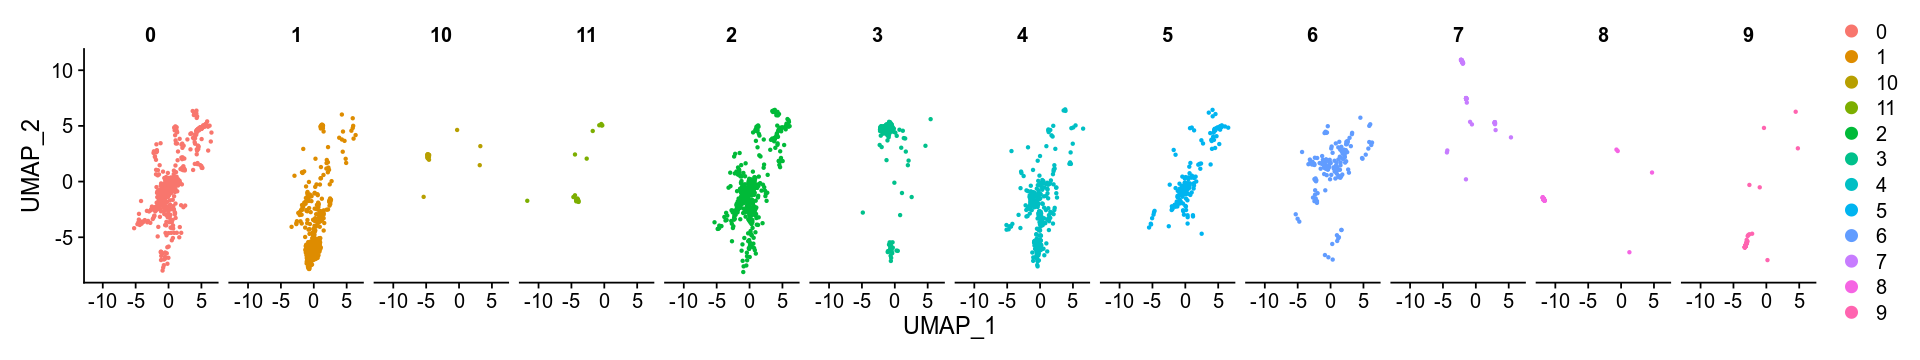

In [52]:
#ht_subset = subset(seuratobj, subset = orig.ident == 'rcmb56-ht')
options(repr.plot.width=16, repr.plot.height=3)
p3 <- DimPlot(ht_subset, reduction = "umap", split.by="seurat_clusters")
p3

In [49]:
ht_subset@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_ATAC,nFeature_ATAC,nCount_SCT,nFeature_SCT,SCT.weight,ATAC.weight,wsnn_res.0.8,seurat_clusters,pANN_0.25_0.09_224,DF.classifications_0.25_0.09_224,pANN_0.25_0.09_780,DF.classifications_0.25_0.09_780
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
AAACATGCACAACAAA-1_1,rcmb56-ht,1244,942,0.00000000,5262,2435,2564,1098,0.6374473,0.3625526762,7,7,0.1899441,Singlet,NA,NA
AAACCAACATAATCGT-1_1,rcmb56-ht,6430,3039,0.27993779,24495,9644,4178,2771,0.4219955,0.5780045099,6,6,0.3603352,Singlet,NA,NA
AAACCGAAGTGCACGC-1_1,rcmb56-ht,4596,2468,0.17406440,13282,6249,3850,2460,0.4799917,0.5200082787,0,0,0.3072626,Singlet,NA,NA
AAACCGGCAGTTTGTG-1_1,rcmb56-ht,8724,2955,0.00000000,9000,4262,3614,1963,0.7903316,0.2096684192,1,1,0.2346369,Singlet,NA,NA
AAACGCGCAGTAGGTG-1_1,rcmb56-ht,6592,3157,0.01516990,29998,12236,4041,2812,0.5876163,0.4123836828,2,2,0.2709497,Singlet,NA,NA
AAACGGATCATTAGTG-1_1,rcmb56-ht,1397,1064,0.00000000,18854,7973,2743,1140,0.5000000,0.5000000000,6,6,0.3268156,Singlet,NA,NA
AAACGGATCCCTGACT-1_1,rcmb56-ht,3143,1849,0.06363347,5259,2675,3142,1845,0.4280664,0.5719335607,0,0,0.2849162,Singlet,NA,NA
AAACGTACAGCATGAG-1_1,rcmb56-ht,2904,1683,0.06887052,6136,2916,2943,1679,0.4579267,0.5420732638,8,8,0.2094972,Singlet,NA,NA
AAAGCACCACAGGAAT-1_1,rcmb56-ht,10997,4056,0.03637356,29577,12017,3168,1905,0.3954087,0.6045913312,1,1,0.2402235,Singlet,NA,NA


In [30]:
class(p2)

[1] "patchwork" "gg"        "ggplot"